In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

print(os.getcwd())

export_path = 'export/'

/Users/kkkzoz/Projects/oreo/benchmarks/cmd/scripts


In [98]:
def extract_segment(file_path):
    match = re.search(r"/([^/]+)_benchmark_results\.csv$", file_path)
    if match:
        return match.group(1)
    return None


def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files


iot_path = "../iot/iot_benchmark_results.csv"
social_path = "../social/social_benchmark_results.csv"
ycsb_paths = list_csv_files("../ycsb")
print(ycsb_paths)


def generate_charts(file_path: str, prefix: str) -> None:
    data = pd.read_csv(file_path)
    data["native_throughput"] = data["operation"] / data["native"]
    data["cg_throughput"] = data["operation"] / data["cg"]
    data["oreo_throughput"] = data["operation"] / data["oreo"]
    
    # Plot Throughput
    plt.figure()
    plt.plot(data["thread"], data["native_throughput"], label="native", marker="o")
    plt.plot(data["thread"], data["cg_throughput"], label="cg", marker="o")
    plt.plot(data["thread"], data["oreo_throughput"], label="oreo", marker="o")
    plt.xlabel("Thread")
    plt.ylabel("Throughput")
    title = f"{prefix}:Throughput vs Thread"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{export_path}/{title}.png")
    plt.show()

    # Plot Latency
    plt.figure()
    plt.plot(data["thread"], data["native_p99"], label="native_p99", marker="o")
    plt.plot(data["thread"], data["cg_p99"], label="cg_p99", marker="o")
    plt.plot(data["thread"], data["oreo_p99"], label="oreo_p99", marker="o")
    plt.xlabel("Thread")
    plt.ylabel("Latency (p99)")
    title = f"{prefix}:Latency (p99) vs Thread"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{export_path}/{title}.png")
    plt.show()

['../ycsb/a_MongoDB_benchmark_results.csv', '../ycsb/a_Redis_benchmark_results.csv', '../ycsb/a_CouchDB_benchmark_results.csv', '../ycsb/a_KVRocks_benchmark_results.csv', '../ycsb/W_Cassandra_benchmark_results.csv', '../ycsb/W_Redis_benchmark_results.csv', '../ycsb/a_Cassandra_benchmark_results.csv', '../ycsb/W_KVRocks_benchmark_results.csv', '../ycsb/W_CouchDB_benchmark_results.csv', '../ycsb/W_MongoDB_benchmark_results.csv']


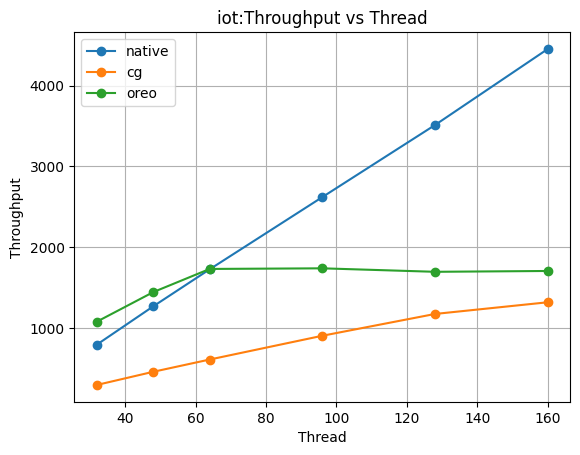

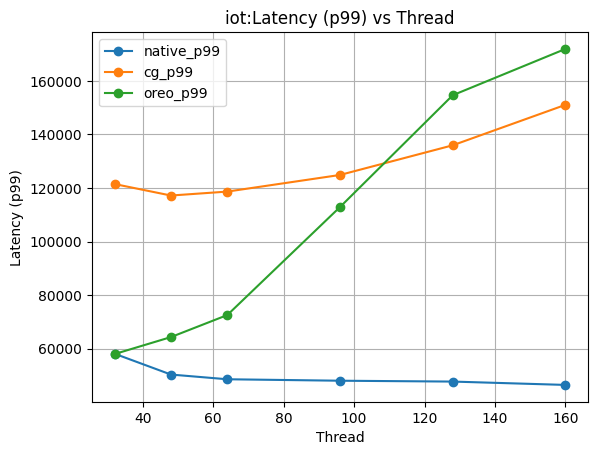

In [99]:
generate_charts(iot_path, "iot")

../ycsb/W_Cassandra_benchmark_results.csv


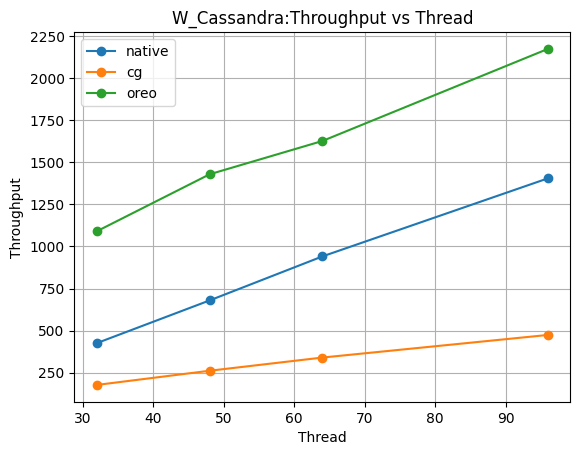

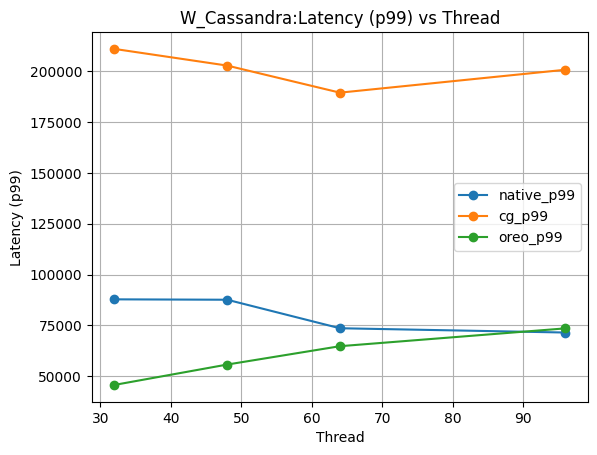

../ycsb/W_CouchDB_benchmark_results.csv


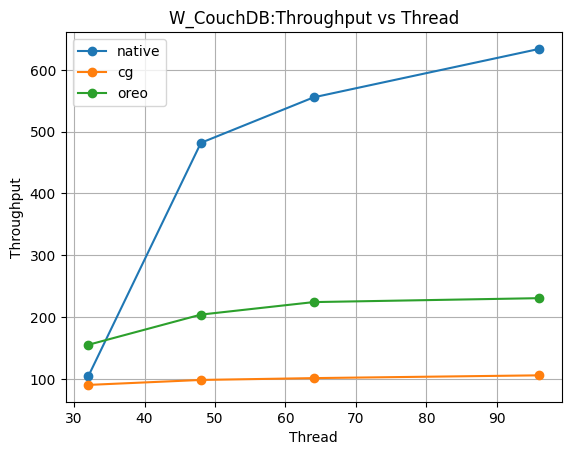

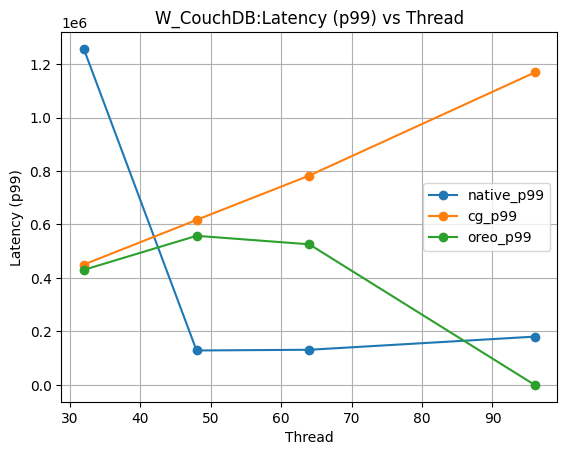

../ycsb/W_KVRocks_benchmark_results.csv


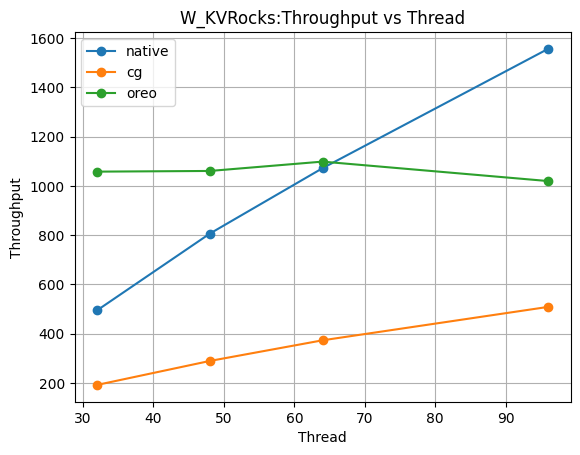

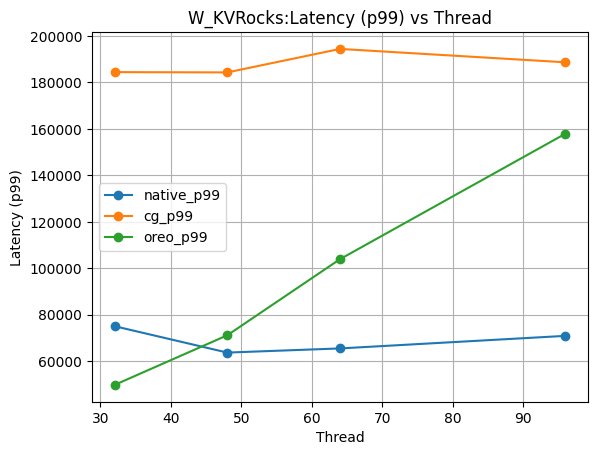

../ycsb/W_MongoDB_benchmark_results.csv


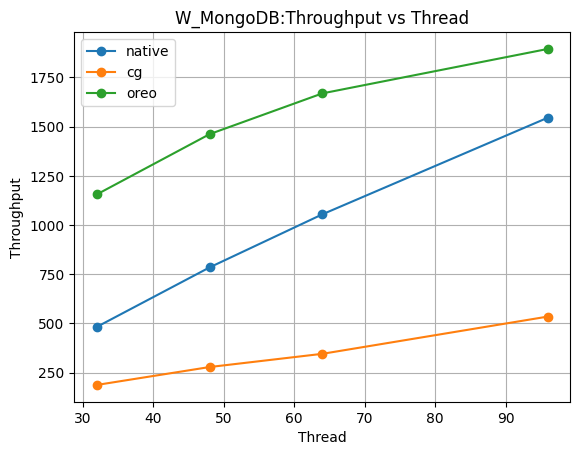

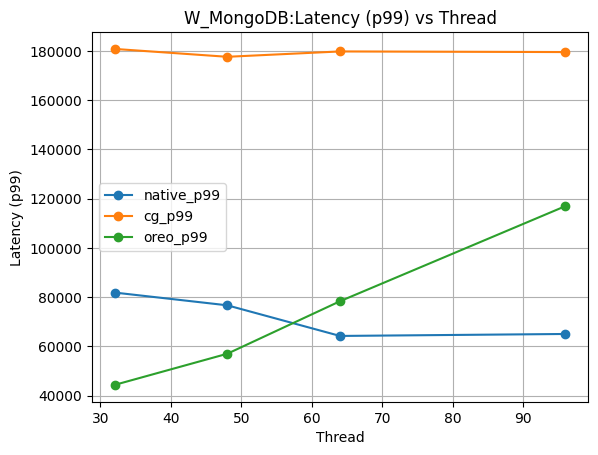

../ycsb/W_Redis_benchmark_results.csv


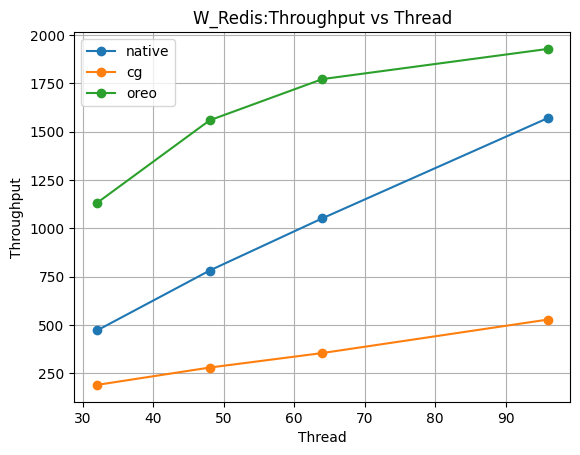

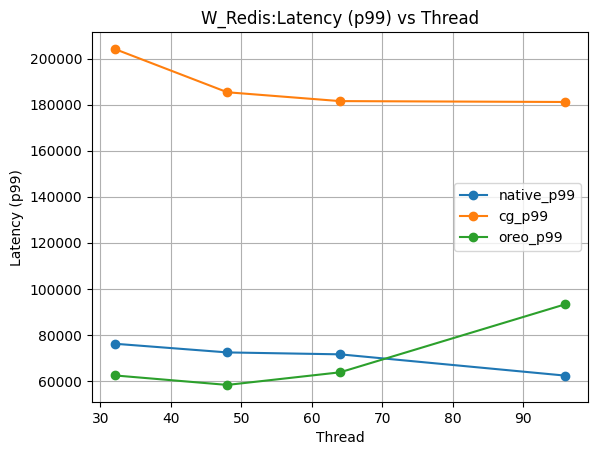

../ycsb/a_Cassandra_benchmark_results.csv


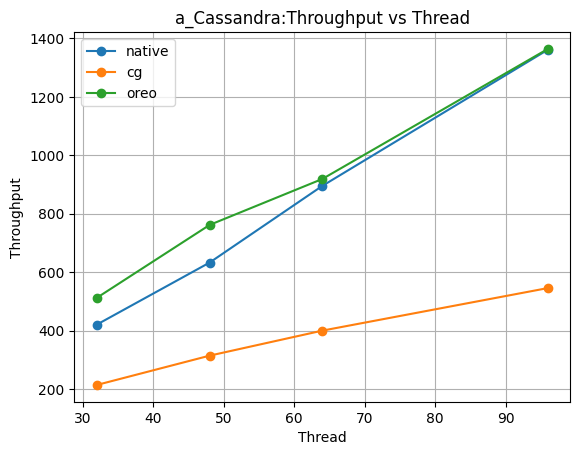

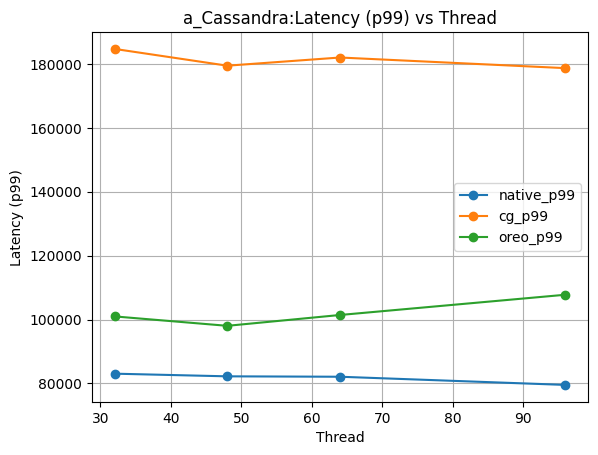

../ycsb/a_CouchDB_benchmark_results.csv


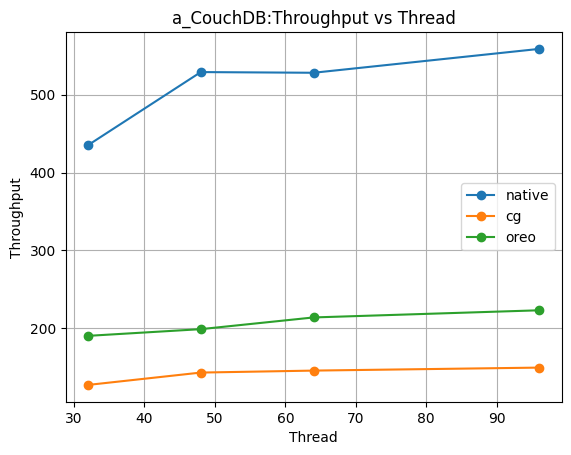

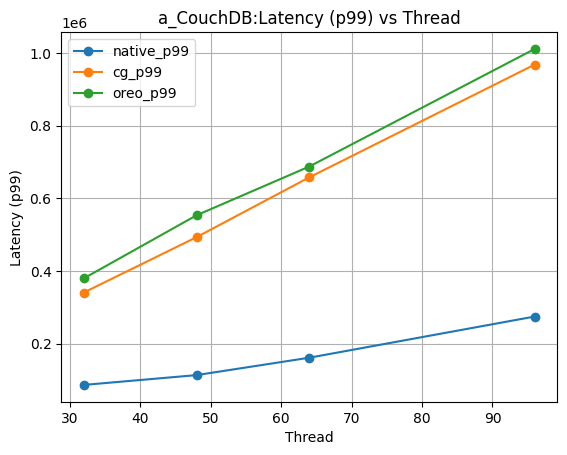

../ycsb/a_KVRocks_benchmark_results.csv


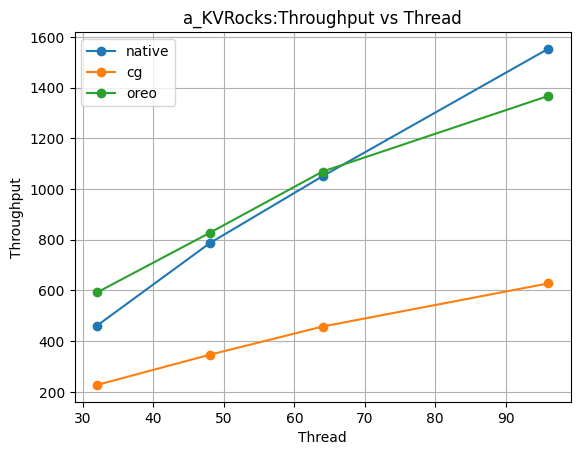

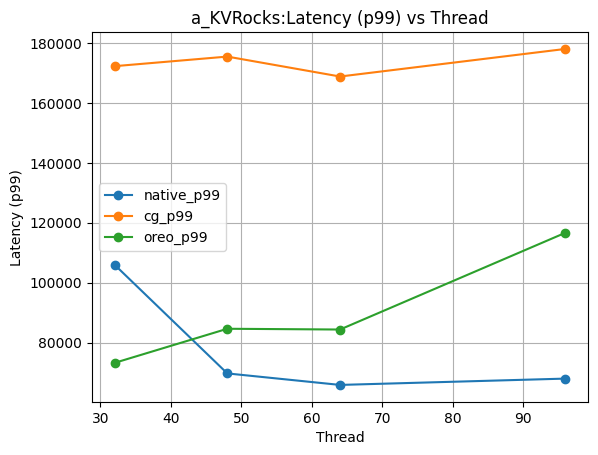

../ycsb/a_MongoDB_benchmark_results.csv


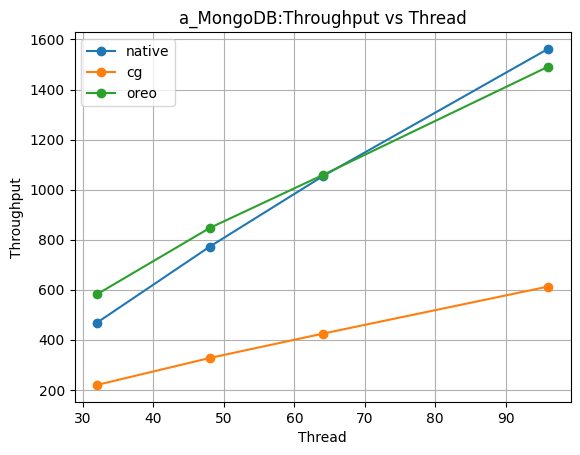

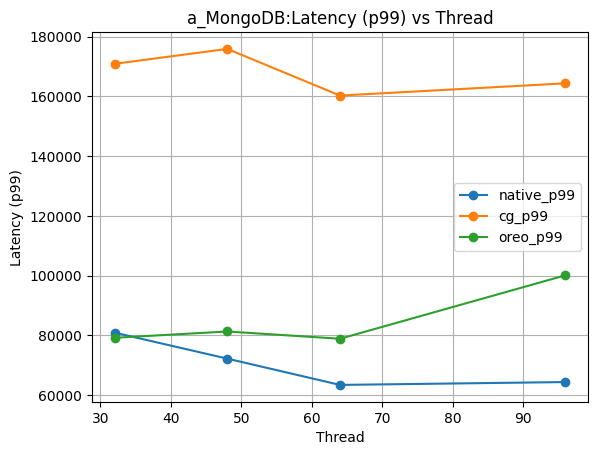

../ycsb/a_Redis_benchmark_results.csv


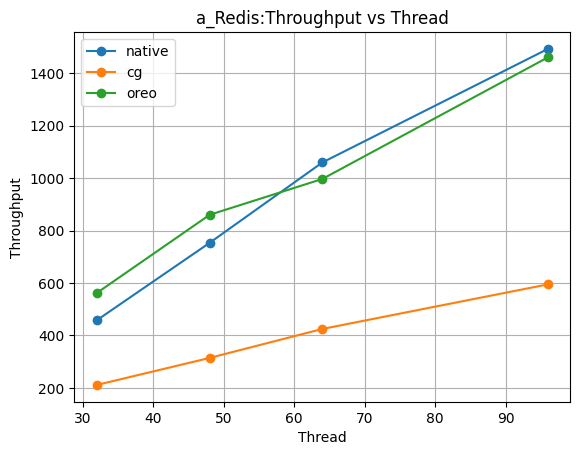

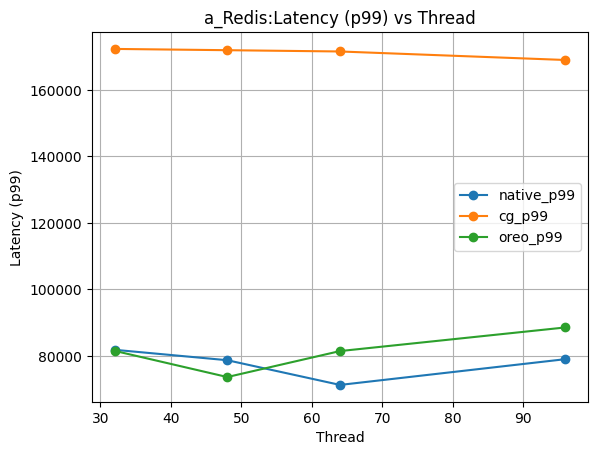

In [100]:
ycsb_paths.sort()
for path in ycsb_paths:
    print(path)
    segment = extract_segment(path)
    generate_charts(path, segment)